In [ ]:
# Title : Glassdoor-Salary-Analysis

In [ ]:
# PROJECT SUMMARY : This project analyzes Glassdoor job listings to understand and predict salaries using data science techniques. After cleaning the data and extracting features like hourly pay, employer-provided salaries, and average salary, we performed exploratory analysis through visualizations such as bar charts, histograms, and a word cloud. Finally, we built and evaluated a regression model to predict average salaries, achieving a reasonable accuracy. This end-to-end project demonstrates skills in data preprocessing, visualization, and machine learning.

In [ ]:
GitHub link :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/glassdoor_jobs.csv')  # replace with your dataset path




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [5]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [6]:
df.isnull().sum()


,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


In [7]:
df.shape

(956, 15)

In [18]:
# Drop columns that aren't needed (adjust column names based on actual headers)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
# ✅ Safe copy after filtering
df = df[df['Salary Estimate'] != '-1'].copy()

# Now you're safe to modify columns
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)

# Clean salary
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_kd = salary.apply(lambda x: x.replace('K', '').replace('$', '').lower())
cleaned = minus_kd.apply(lambda x: x.replace('per hour', '').replace('employer provided salary:', ''))

# Parse salary
df['min_salary'] = cleaned.apply(lambda x: int(x.split('-')[0].strip()))
df['max_salary'] = cleaned.apply(lambda x: int(x.split('-')[1].strip()))
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2



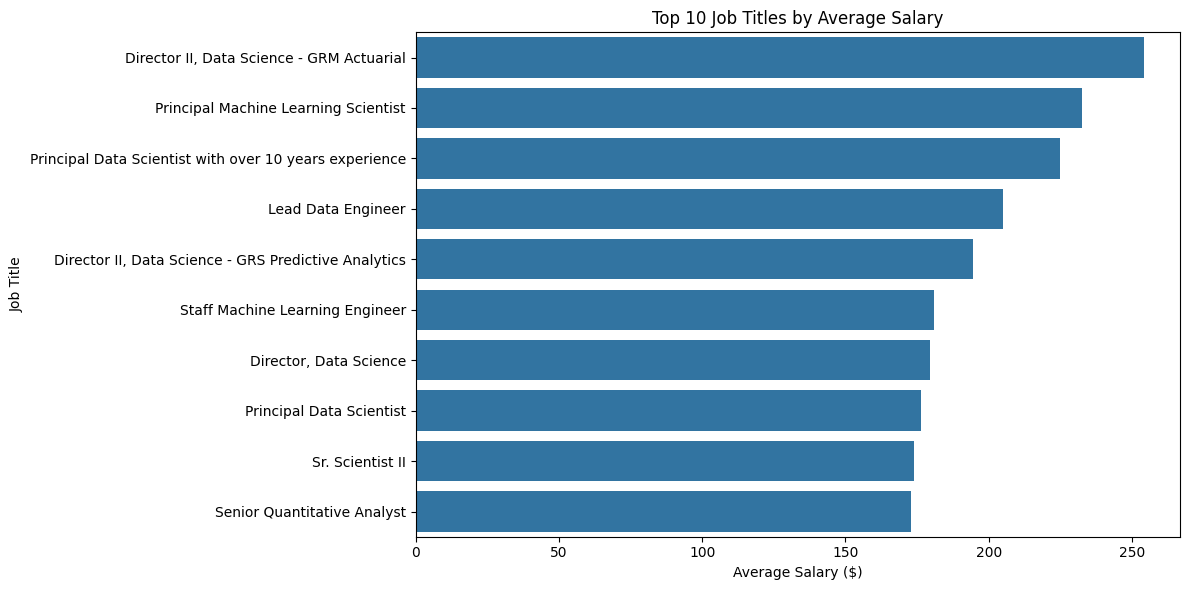

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
job_salary = df.groupby('Job Title')['avg_salary'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=job_salary.values, y=job_salary.index)
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()



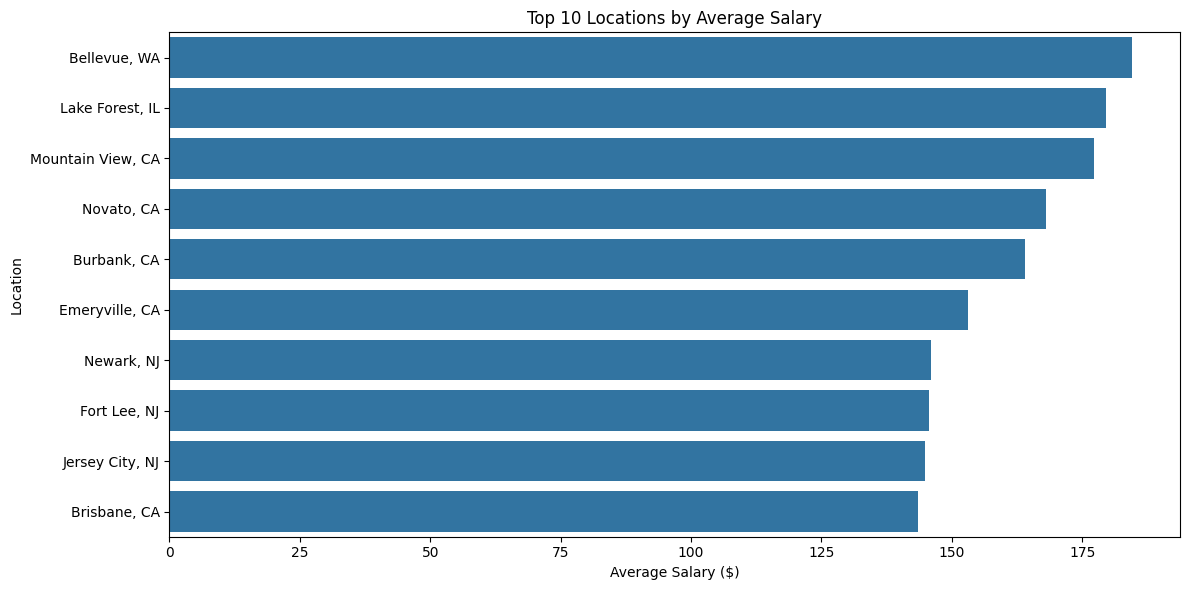

In [25]:
plt.figure(figsize=(12,6))
location_salary = df.groupby('Location')['avg_salary'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=location_salary.values, y=location_salary.index)
plt.title('Top 10 Locations by Average Salary')
plt.xlabel('Average Salary ($)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


In [27]:
print(df.columns.tolist())


['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary']


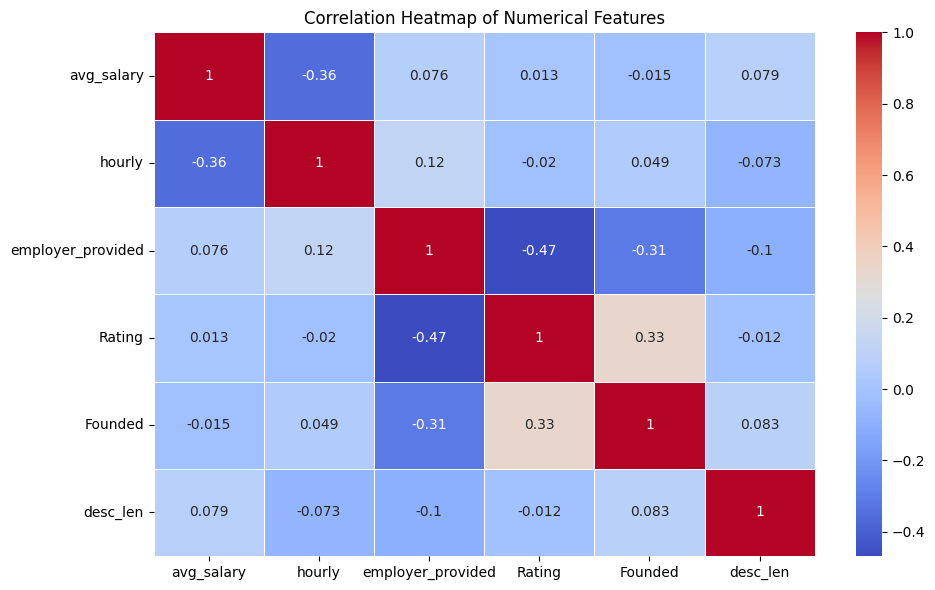

In [28]:
# Optional: Create 'desc_len' for description length
df['desc_len'] = df['Job Description'].apply(len)

# Use only existing numeric columns
numerical_cols = ['avg_salary', 'hourly', 'employer_provided', 'Rating', 'Founded', 'desc_len']

# Drop rows with missing values in these columns (if needed)
corr = df[numerical_cols].dropna().corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


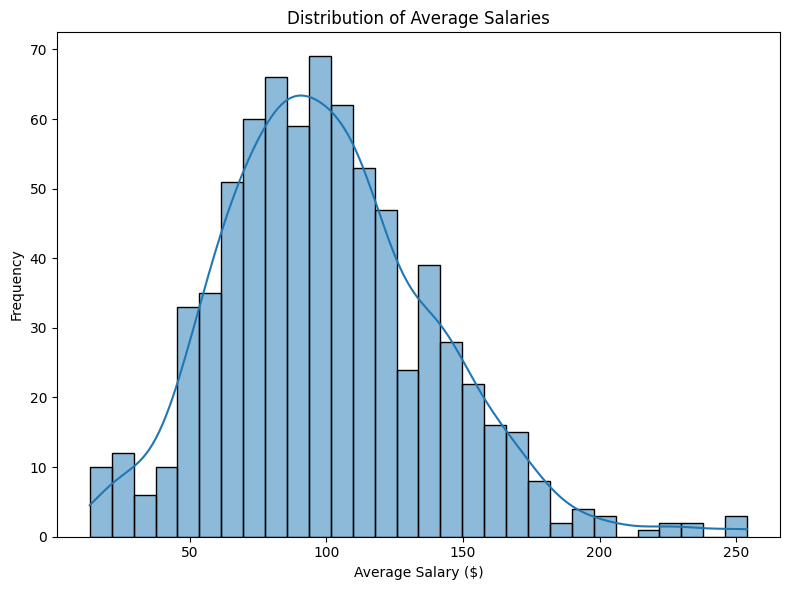

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df['avg_salary'], kde=True, bins=30)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



<ipython-input-30-13573003>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')


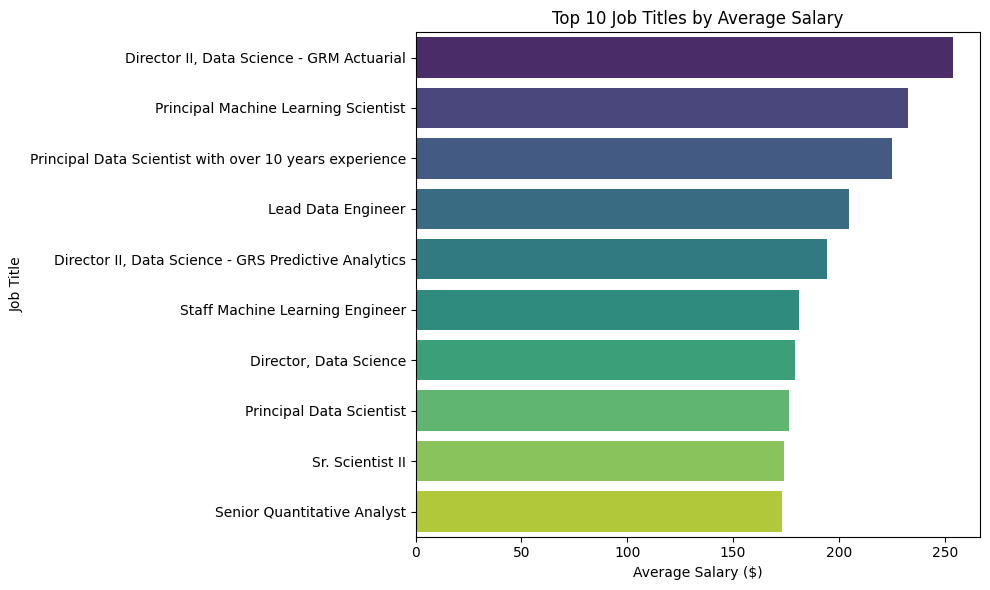

In [30]:
plt.figure(figsize=(10,6))
top_jobs = df.groupby('Job Title')['avg_salary'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary ($)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


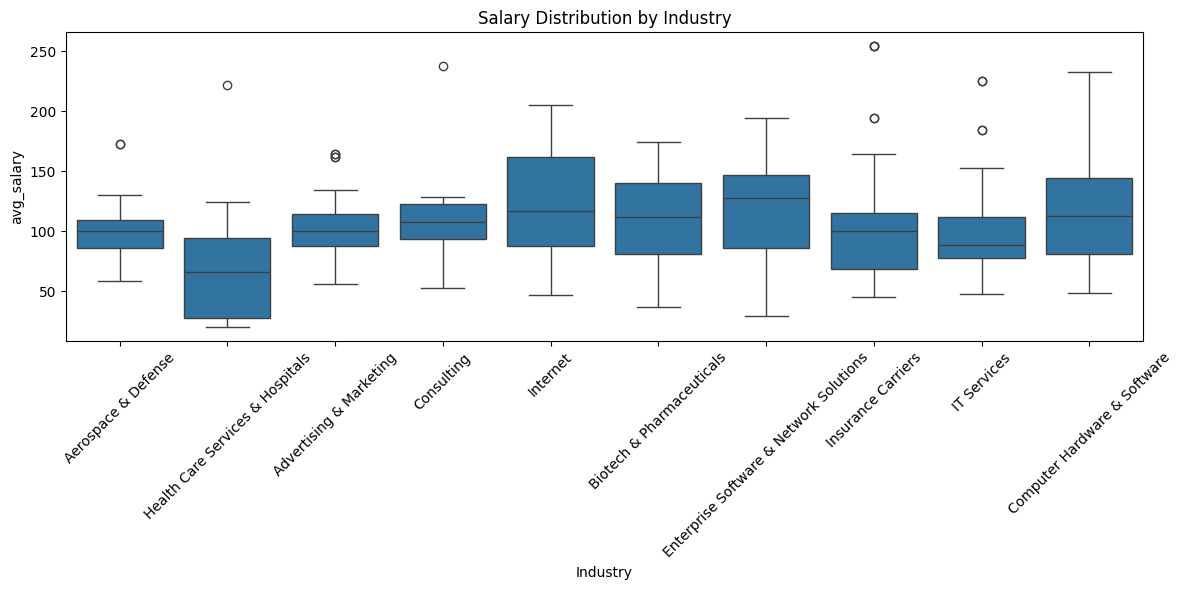

In [31]:
plt.figure(figsize=(12,6))
top_industries = df['Industry'].value_counts().head(10).index
sns.boxplot(data=df[df['Industry'].isin(top_industries)], x='Industry', y='avg_salary')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Industry')
plt.tight_layout()
plt.show()


In [32]:
pip install wordcloud


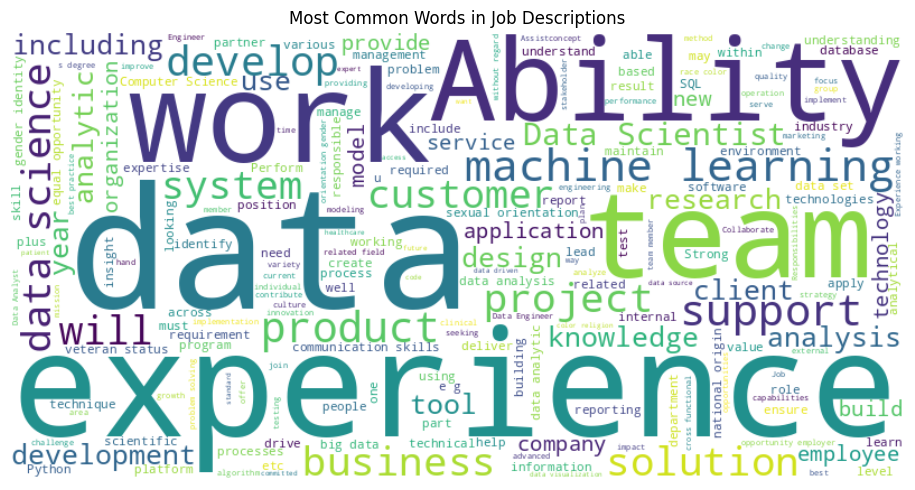

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(df['Job Description'].dropna())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Job Descriptions")
plt.tight_layout()
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

features = df[['hourly','employer_provided','Rating','desc_len']]  # and any other numeric/categorical features
target = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)



MAE: 18.15167393736018
RMSE: 28.108835130923854


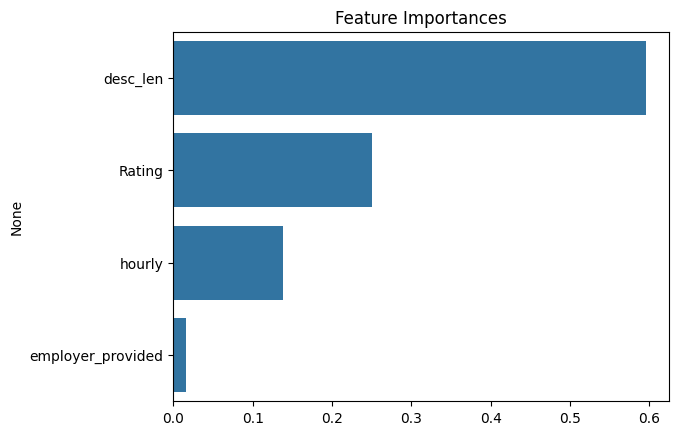

In [37]:
import pandas as pd
feat_imp = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances")
plt.show()
